<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Neural Networks: Keras and Tensorflow
</p>
</div>

Data Science Cohort Live NYC Feb 2022
<p>Phase 4: Topic 41</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

In [4]:
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits, load_sample_images

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
    
%load_ext autoreload
%autoreload 2

#### Neural Networks: Packages

When manually implementing:

- have to keep track of forward and backwards propagation for each layer:
    - equations and updates depends on specific layer activations
- manage caching updates to gradients and weights/activations appropriately

**Deep Learning frameworks take care of this for us**

In addition:

- efficient matrix math for speedup.
- use variants of gradient descent that are **much** faster/better.

Major frameworks:

<img src = "Images/kerastf.png" >
<center> Keras: high level API of Tensorflow. </center>

- Keras: apt for quickly building/trying neural network architectures with standard layers/optimizers. Still build complex networks.
- Tensorflow: for building more customized networks and more control of optimization.

<center><img src = "Images/pytorch.png" >
More customizable than Keras. More pythonic than base Tensorflow. Nice functionalities for NLP. </center>


We will use Keras.

In [2]:
from tensorflow import keras

Keras has two major neural network construction frameworks:
- Sequential vs Functional API

Sequential API:

<img src = "Images/sequentialvsfunctional.png" >

<center>Apt for simpler feedforward network topologies.</center>

Functional API:

<center><img src = "Images/skipconnection.png" ></center>

Skip connections, branching, etc.


#### The Sequential API

Take in a simple and sufficiently interesting dataset:

- demonstrate non-trivial decision boundary
- show sequential API at work

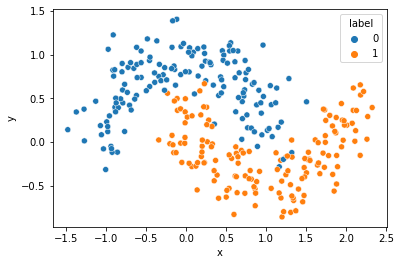

In [3]:
# generate two moons dataset
import seaborn as sns
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=10)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

sns.scatterplot(x = 'x', y = 'y', hue = 'label', data = df )
plt.show()

Import Sequential object: use Sequential API to construct models

In [4]:
from tensorflow.keras.models import Sequential

We want to start defining layers in the model:
    
The most common layer type in neural networks: 
- the **densely** connected layer

<img src = "Images/dense_layer.png" >

In [5]:
# creates densely connected layer object
from tensorflow.keras.layers import Dense

# defines input layer, not necessary in sequential API
# but nice for visualizing network later
from tensorflow.keras.layers import Input 

The Dense object constructor's basic arguments:
- units: number of nodes in layer
- activation: 'relu', 'tanh', 'sigmoid', 'softmax'


Defining the model: a shallow neural network

In [6]:
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu')) # one hidden layer
model.add(Dense(units=1, activation='sigmoid'))

Building/compiling the model:

- define objective function and optimizer
- define metric to evaluate train/validation
- build the network connections, weight matrices, initializes, etc.

In [7]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'AUC'])

In [8]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'AUC'])

Some other loss functions:
- multiclass: 'categorical_crossentropy'
- regression: 'mean_squared_error'
- regression: 'mean_absolute_error'

The optimizer:

- Adam Optimizer: 
    - smoothens learning process 
    - uses adaptive learning rate.

A pretty good optimizer. Many other optimizers (NAdam, Adadelta).

#### Optimizers have hyperparameters.

- Can help in training speed up / finding minimum

model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy', 'AUC'])

In [9]:
from tensorflow.keras.optimizers import Adam

In [10]:
opt = Adam(learning_rate = 0.01, beta_1 = 0.9, beta_2 = 0.999 ) # typical parameters

In [11]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'AUC'])

Metrics: takes in list (calculates metrics in list at each epoch):

Regression:
- 'mae'
- 'mse'
- 'rmse'

Classification:
- 'accuracy'
- 'AUC'
- 'fmeasure'
etc.

Keras provides metrics callable as objects:
- more metrics available
- pass in arguments (probability threshold, etc.)
- build your own metrics.

See documentation for more information.

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


Train test split the data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

#### .fit() method

- batch_size = # of points you train on in given forward/back-prop loop

typical batch sizes: 1, 32, 64, 128, 256, 512

Batch size:

- Stochastic Gradient Descent: batch_size = 1
- Minibatch Gradient Descent: batch_size = $n_{batch} < N_{train}$
- Batch Gradient Descent: full training set fed in on each lforward/back-prop loop

The intuition behind SGD, mini-batch:

SGD: single point $i$
$$ \textbf{w}_{k+1} = \textbf{w}_k - \alpha \nabla_{\textbf{w}}L(y_i, \hat{y}_i) $$

- Using a single point may not be good enough to sample loss function and its gradient. Noisy descent. 
- Can go wrong direction.
- Effectively looping one point at a time. Computationally inefficient.

Mini-batch gives you average of gradient over a sample of training set: often good enough!

$$ \textbf{w}_{k+1} = \textbf{w}_k - \frac{\alpha}{n_{batch}} \sum_{i=1}^{n_{batch}} \nabla_{\textbf{w}}L(y_i, \hat{y}_i) $$

- Substantially smaller amount of data fed through: still make progress.

Batch gradient descent: all training data.
    
- Will always lower objective on training.
- But depending on dataset:
- manipulating huge matrices just to make one gradient descent step.

<img src = "Images/gradient_descent.png" >

#### Epochs
- Number of times to cycle through **entire** training data.
- Implies number of forward/backprop cycles is: $$ \frac{N_{train}}{n_{batch}} \times \text{epochs} $$

Can train through all epochs defined or:

**Earlystopping callback on training**

- Monitor training loss and set improvement threshold (min_delta)
- Waiting certain number of epochs if no improvements (patience).
- Terminate training.

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
trainCallback = EarlyStopping(monitor='loss', min_delta = 1e-6, patience = 5)

**Validation set**

- can feed an external validation set 
- hold out a fraction of training set for validation
- evaluates on train and validation at each epoch

In [15]:
history = model.fit(X_train, y_train, epochs = 10000, batch_size = 32, validation_split = 0.2, callbacks=[trainCallback])

Epoch 1/10000
6/6 [==============================] - 1s 120ms/step - loss: 0.7316 - accuracy: 0.4635 - auc: 0.2878 - val_loss: 0.7324 - val_accuracy: 0.4167 - val_auc: 0.4098
Epoch 2/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.7070 - accuracy: 0.5729 - auc: 0.4265 - val_loss: 0.7097 - val_accuracy: 0.4375 - val_auc: 0.5982
Epoch 3/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.6851 - accuracy: 0.6094 - auc: 0.5978 - val_loss: 0.6880 - val_accuracy: 0.6042 - val_auc: 0.6982
Epoch 4/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.6651 - accuracy: 0.7031 - auc: 0.7535 - val_loss: 0.6668 - val_accuracy: 0.6250 - val_auc: 0.8821
Epoch 5/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.6451 - accuracy: 0.7500 - auc: 0.8810 - val_loss: 0.6471 - val_accuracy: 0.6667 - val_auc: 0.9473
Epoch 6/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.6264 - accuracy: 0.8073 - auc: 0.9281 - val_loss: 0.6283 -

6/6 [==============================] - 0s 6ms/step - loss: 0.2881 - accuracy: 0.8802 - auc: 0.9533 - val_loss: 0.2799 - val_accuracy: 0.8750 - val_auc: 0.9714
Epoch 96/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2878 - accuracy: 0.8802 - auc: 0.9534 - val_loss: 0.2791 - val_accuracy: 0.8750 - val_auc: 0.9714
Epoch 97/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.2875 - accuracy: 0.8802 - auc: 0.9534 - val_loss: 0.2790 - val_accuracy: 0.8750 - val_auc: 0.9714
Epoch 98/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.2872 - accuracy: 0.8802 - auc: 0.9534 - val_loss: 0.2783 - val_accuracy: 0.8750 - val_auc: 0.9714
Epoch 99/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2869 - accuracy: 0.8802 - auc: 0.9536 - val_loss: 0.2770 - val_accuracy: 0.8750 - val_auc: 0.9714
Epoch 100/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.2865 - accuracy: 0.8802 - auc: 0.9536 - val_loss: 0.2765 - val_accur

6/6 [==============================] - 0s 7ms/step - loss: 0.2604 - accuracy: 0.8750 - auc: 0.9607 - val_loss: 0.2431 - val_accuracy: 0.8958 - val_auc: 0.9804
Epoch 188/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.2600 - accuracy: 0.8802 - auc: 0.9607 - val_loss: 0.2422 - val_accuracy: 0.8958 - val_auc: 0.9804
Epoch 189/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.2596 - accuracy: 0.8750 - auc: 0.9611 - val_loss: 0.2420 - val_accuracy: 0.8958 - val_auc: 0.9804
Epoch 190/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.2592 - accuracy: 0.8750 - auc: 0.9611 - val_loss: 0.2419 - val_accuracy: 0.8958 - val_auc: 0.9804
Epoch 191/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2588 - accuracy: 0.8750 - auc: 0.9612 - val_loss: 0.2419 - val_accuracy: 0.8958 - val_auc: 0.9804
Epoch 192/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.2586 - accuracy: 0.8802 - auc: 0.9614 - val_loss: 0.2411 - val_a

6/6 [==============================] - 0s 6ms/step - loss: 0.2196 - accuracy: 0.8958 - auc: 0.9734 - val_loss: 0.2044 - val_accuracy: 0.8958 - val_auc: 0.9839
Epoch 280/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.2191 - accuracy: 0.8958 - auc: 0.9734 - val_loss: 0.2038 - val_accuracy: 0.8958 - val_auc: 0.9839
Epoch 281/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.2186 - accuracy: 0.8958 - auc: 0.9737 - val_loss: 0.2029 - val_accuracy: 0.8958 - val_auc: 0.9839
Epoch 282/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2183 - accuracy: 0.8958 - auc: 0.9737 - val_loss: 0.2027 - val_accuracy: 0.8958 - val_auc: 0.9839
Epoch 283/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.2179 - accuracy: 0.8958 - auc: 0.9737 - val_loss: 0.2009 - val_accuracy: 0.8958 - val_auc: 0.9839
Epoch 284/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2173 - accuracy: 0.8958 - auc: 0.9739 - val_loss: 0.2002 - val_a

Epoch 372/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1637 - accuracy: 0.9375 - auc: 0.9871 - val_loss: 0.1437 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 373/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.1630 - accuracy: 0.9375 - auc: 0.9872 - val_loss: 0.1433 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 374/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1635 - accuracy: 0.9375 - auc: 0.9872 - val_loss: 0.1448 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 375/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.1617 - accuracy: 0.9427 - auc: 0.9878 - val_loss: 0.1439 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 376/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1611 - accuracy: 0.9427 - auc: 0.9880 - val_loss: 0.1427 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 377/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1604 - accuracy: 0.9427 - auc: 0.9881 - val_loss

Epoch 419/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1385 - accuracy: 0.9531 - auc: 0.9921 - val_loss: 0.1272 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 420/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1381 - accuracy: 0.9531 - auc: 0.9921 - val_loss: 0.1264 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 421/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.1377 - accuracy: 0.9531 - auc: 0.9921 - val_loss: 0.1264 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 422/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1373 - accuracy: 0.9531 - auc: 0.9920 - val_loss: 0.1254 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 423/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1368 - accuracy: 0.9583 - auc: 0.9922 - val_loss: 0.1254 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 424/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.1363 - accuracy: 0.9583 - auc: 0.9923 - val_loss

Epoch 466/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.1214 - accuracy: 0.9583 - auc: 0.9939 - val_loss: 0.1133 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 467/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1211 - accuracy: 0.9583 - auc: 0.9938 - val_loss: 0.1130 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 468/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.1209 - accuracy: 0.9583 - auc: 0.9938 - val_loss: 0.1132 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 469/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.1210 - accuracy: 0.9583 - auc: 0.9942 - val_loss: 0.1141 - val_accuracy: 0.9792 - val_auc: 0.9955
Epoch 470/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.1208 - accuracy: 0.9583 - auc: 0.9939 - val_loss: 0.1125 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 471/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.1200 - accuracy: 0.9583 - auc: 0.9941 - val_loss

Epoch 559/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.1011 - accuracy: 0.9635 - auc: 0.9963 - val_loss: 0.1000 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 560/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1008 - accuracy: 0.9635 - auc: 0.9965 - val_loss: 0.1001 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 561/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.1010 - accuracy: 0.9635 - auc: 0.9963 - val_loss: 0.1006 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 562/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.1004 - accuracy: 0.9635 - auc: 0.9967 - val_loss: 0.0997 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 563/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1003 - accuracy: 0.9635 - auc: 0.9966 - val_loss: 0.0993 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 564/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1001 - accuracy: 0.9635 - auc: 0.9966 - val_loss

Epoch 606/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0940 - accuracy: 0.9583 - auc: 0.9971 - val_loss: 0.0961 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 607/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0942 - accuracy: 0.9583 - auc: 0.9971 - val_loss: 0.0963 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 608/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0938 - accuracy: 0.9583 - auc: 0.9971 - val_loss: 0.0963 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 609/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0936 - accuracy: 0.9583 - auc: 0.9971 - val_loss: 0.0956 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 610/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0935 - accuracy: 0.9583 - auc: 0.9971 - val_loss: 0.0954 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 611/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0935 - accuracy: 0.9583 - auc: 0.9971 - val_loss

Epoch 653/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0885 - accuracy: 0.9635 - auc: 0.9975 - val_loss: 0.0942 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 654/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0884 - accuracy: 0.9635 - auc: 0.9974 - val_loss: 0.0936 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 655/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0881 - accuracy: 0.9635 - auc: 0.9975 - val_loss: 0.0937 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 656/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0881 - accuracy: 0.9635 - auc: 0.9975 - val_loss: 0.0940 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 657/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0880 - accuracy: 0.9635 - auc: 0.9975 - val_loss: 0.0941 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 658/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0878 - accuracy: 0.9635 - auc: 0.9975 - val_loss

Epoch 700/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0840 - accuracy: 0.9635 - auc: 0.9975 - val_loss: 0.0915 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 701/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0840 - accuracy: 0.9635 - auc: 0.9975 - val_loss: 0.0922 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 702/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0838 - accuracy: 0.9635 - auc: 0.9976 - val_loss: 0.0921 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 703/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0837 - accuracy: 0.9635 - auc: 0.9975 - val_loss: 0.0916 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 704/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0836 - accuracy: 0.9635 - auc: 0.9975 - val_loss: 0.0918 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 705/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0835 - accuracy: 0.9635 - auc: 0.9976 - val_loss

Epoch 747/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0803 - accuracy: 0.9635 - auc: 0.9976 - val_loss: 0.0911 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 748/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0803 - accuracy: 0.9635 - auc: 0.9976 - val_loss: 0.0916 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 749/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0801 - accuracy: 0.9635 - auc: 0.9976 - val_loss: 0.0908 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 750/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0799 - accuracy: 0.9635 - auc: 0.9976 - val_loss: 0.0904 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 751/10000
6/6 [==============================] - 0s 8ms/step - loss: 0.0799 - accuracy: 0.9635 - auc: 0.9976 - val_loss: 0.0899 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 752/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0798 - accuracy: 0.9635 - auc: 0.9976 - val_loss

Epoch 794/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0772 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.0913 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 795/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0767 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.0908 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 796/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0766 - accuracy: 0.9635 - auc: 0.9977 - val_loss: 0.0899 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 797/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0766 - accuracy: 0.9635 - auc: 0.9977 - val_loss: 0.0898 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 798/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0766 - accuracy: 0.9635 - auc: 0.9976 - val_loss: 0.0892 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 799/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0766 - accuracy: 0.9635 - auc: 0.9977 - val_loss

Epoch 841/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0739 - accuracy: 0.9688 - auc: 0.9976 - val_loss: 0.0907 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 842/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0739 - accuracy: 0.9688 - auc: 0.9976 - val_loss: 0.0899 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 843/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0739 - accuracy: 0.9688 - auc: 0.9976 - val_loss: 0.0895 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 844/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0737 - accuracy: 0.9688 - auc: 0.9976 - val_loss: 0.0896 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 845/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0739 - accuracy: 0.9688 - auc: 0.9976 - val_loss: 0.0905 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 846/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0738 - accuracy: 0.9688 - auc: 0.9975 - val_loss

Epoch 888/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0717 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0912 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 889/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0715 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0905 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 890/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0714 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0903 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 891/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0714 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0901 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 892/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0713 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0902 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 893/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0715 - accuracy: 0.9688 - auc: 0.9977 - val_loss

Epoch 935/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0696 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0910 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 936/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0695 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0913 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 937/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0693 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0908 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 938/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0693 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0907 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 939/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0693 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0906 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 940/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0693 - accuracy: 0.9688 - auc: 0.9978 - val_loss

Epoch 1028/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0663 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0917 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1029/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0662 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0921 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1030/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0663 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0916 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1031/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0662 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0922 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1032/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0661 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0922 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1033/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0661 - accuracy: 0.9688 - auc: 0.9979 - va

6/6 [==============================] - 0s 6ms/step - loss: 0.0640 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0934 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1121/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0636 - accuracy: 0.9688 - auc: 0.9980 - val_loss: 0.0926 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1122/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0634 - accuracy: 0.9688 - auc: 0.9980 - val_loss: 0.0926 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1123/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0633 - accuracy: 0.9688 - auc: 0.9980 - val_loss: 0.0928 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1124/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0634 - accuracy: 0.9688 - auc: 0.9980 - val_loss: 0.0925 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1125/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0634 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0931 - 

Epoch 1167/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0622 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0925 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1168/10000
6/6 [==============================] - 0s 8ms/step - loss: 0.0625 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0927 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1169/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0622 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0930 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1170/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0623 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0933 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1171/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0625 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0923 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1172/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0622 - accuracy: 0.9688 - auc: 0.9980 - va

In [16]:
# predict method outputs probability of
# being class 1
y_proba = model.predict(X_test) 
y_proba[0:5]

array([[9.99975085e-01],
       [9.97676134e-01],
       [9.79836404e-01],
       [9.98979926e-01],
       [1.10956485e-07]], dtype=float32)

In [17]:
# getting class predictions
y_pred = (y_proba > 0.5).astype('int')
y_pred[0:5]

array([[1],
       [1],
       [1],
       [1],
       [0]])

In [18]:
_, test_accuracy, test_AUC = model.evaluate(X_test, y_test, verbose=1)
print(test_accuracy, test_AUC)

2/2 [==============================] - 0s 0s/step - loss: 0.0723 - accuracy: 0.9667 - auc: 0.9989
0.9666666388511658 0.9988776445388794


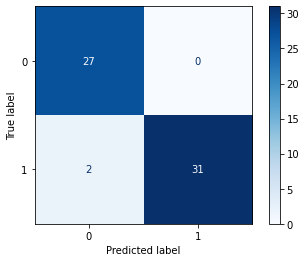

In [19]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

View decision boundary

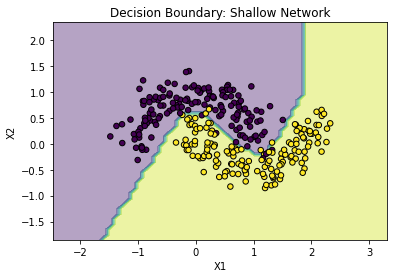

In [20]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, ax = plt.subplots()

Z = (model.predict(np.c_[xx.ravel(), yy.ravel()]) > 0.5).astype('int')
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(X[:, 0], X[:, 1], c = y, s=30, edgecolor="k")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Decision Boundary: Shallow Network')
plt.show()

The model object returns a history method:
- history attribute is a dictionary storing:
   - training/validation losses.
   - metrics on train/validation sets.

In [21]:
train_accuracy = history.history['loss']
validation_accuracy = history.history['val_loss']
train_history = pd.DataFrame(history.history)
train_history.index.name = 'epochs'
train_history.head()

,loss,accuracy,auc,val_loss,val_accuracy,val_auc
epochs,,,,,,
0,0.731649,0.463542,0.287771,0.732354,0.416667,0.409821
1,0.706961,0.572917,0.426530,0.709705,0.437500,0.598214
2,0.685087,0.609375,0.597796,0.688037,0.604167,0.698214
3,0.665099,0.703125,0.753518,0.666784,0.625000,0.882143
4,0.645143,0.750000,0.881041,0.647065,0.666667,0.947321


Plotting history:

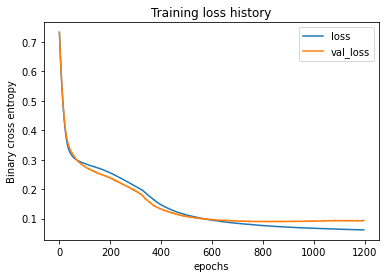

In [22]:
col_list = ['loss', 'val_loss']
train_history[col_list].plot()
plt.ylabel('Binary cross entropy')
plt.title('Training loss history')
plt.show()

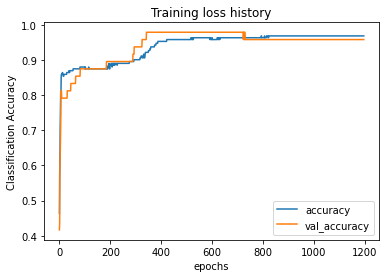

In [23]:
col_list = ['accuracy', 'val_accuracy']
train_history[col_list].plot()
plt.ylabel('Classification Accuracy')
plt.title('Training loss history')
plt.show()

#### Using neural networks to solve some harder problems

#### Image classificaton of hand-written digits

- The MNIST dataset: a classic benchmark for neural network image classification

In [2]:
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array

In [5]:
# load in the data
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

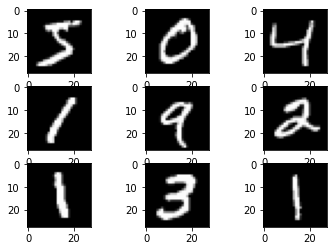

In [229]:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
plt.show()

Good practice to normalize/standardize feature inputs:
- makes learning faster (optimization doesn't depend on variable scale)


<img src = "Images/normalize_nn.png" >

Another reason:
- keeping values small helps keeps weights stable

In [7]:
x_train = x_train/255 # normalization
x_test = x_test/255

# Keras requires multi-class labels to be one-hot encoded
y_tr_one_hot = to_categorical(y_train)
y_tt_one_hot = to_categorical(y_test)
y_tt_one_hot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#### Sequential model: add another hidden layer

- additional layer will help us learn more complex features
- note: we've added a few more units in first hidden layer as well.

In [186]:
model_images = Sequential()
model_images.add(Flatten(input_shape=(28, 28))) # flattens each 28x28 image into a vector
model_images.add(Dense(32, activation='relu'))
model_images.add(Dense(8, activation='relu'))
model_images.add(Dense(10, activation='softmax')) # number of units = number of target classes

In [187]:
model_images.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'] )

Let's train the model.

- Here we will use **validation** loss: stopping to prevent overfitting.

In [188]:
valcallback = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 2)

In [189]:
history_mnist = model_images.fit(x_train, y_tr_one_hot, epochs=100, batch_size= 32, validation_split = 0.2, 
                 callbacks = [trainCallback] )

Epoch 1/100
1500/1500 [==============================] - 1s 774us/step - loss: 2.2874 - accuracy: 0.3493 - val_loss: 1.5056 - val_accuracy: 0.4221
Epoch 2/100
1500/1500 [==============================] - 1s 687us/step - loss: 1.4385 - accuracy: 0.4518 - val_loss: 1.3431 - val_accuracy: 0.4602
Epoch 3/100
1500/1500 [==============================] - 1s 680us/step - loss: 1.3049 - accuracy: 0.4831 - val_loss: 1.2729 - val_accuracy: 0.5020
Epoch 4/100
1500/1500 [==============================] - 1s 680us/step - loss: 1.1773 - accuracy: 0.5470 - val_loss: 1.1008 - val_accuracy: 0.5732
Epoch 5/100
1500/1500 [==============================] - 1s 697us/step - loss: 0.9529 - accuracy: 0.6572 - val_loss: 0.8743 - val_accuracy: 0.6750
Epoch 6/100
1500/1500 [==============================] - 1s 676us/step - loss: 0.8197 - accuracy: 0.7128 - val_loss: 0.7188 - val_accuracy: 0.7551
Epoch 7/100
1500/1500 [==============================] - 1s 680us/step - loss: 0.6092 - accuracy: 0.8036 - val_loss: 0

In [190]:
# probability for each class
y_proba = model_images.predict(x_test)
y_proba

array([[3.1747200e-09, 6.7544018e-04, 1.3643518e-06, ..., 9.9814034e-01,
        7.9045307e-08, 1.1823161e-03],
       [1.1135581e-03, 1.3649272e-04, 9.7762465e-01, ..., 4.2987512e-03,
        5.1087141e-03, 7.9568627e-04],
       [1.2890829e-12, 9.9999654e-01, 8.6728948e-22, ..., 3.4793663e-06,
        2.3705480e-08, 1.6669221e-08],
       ...,
       [4.5712562e-10, 6.4900634e-15, 8.9081267e-09, ..., 2.1129536e-09,
        6.5733310e-08, 3.2922107e-04],
       [4.3357992e-33, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        3.1330905e-25, 1.4457720e-25],
       [4.5008068e-14, 7.0020982e-11, 2.4162309e-37, ..., 2.9839971e-24,
        9.1886405e-13, 1.7393647e-21]], dtype=float32)

In [192]:
model_images.evaluate(x_test, y_tt_one_hot)

313/313 [==============================] - 0s 864us/step - loss: 0.3076 - accuracy: 0.9491


[0.3075576722621918, 0.9491000175476074]

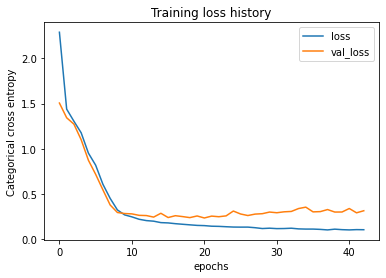

In [195]:
train_mnist_history = pd.DataFrame(history_mnist.history)
train_mnist_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_mnist_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

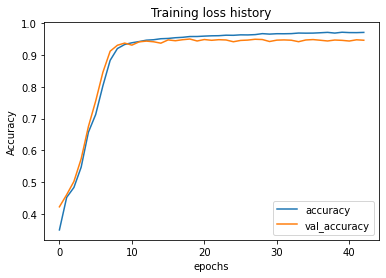

In [199]:
col_list = ['accuracy', 'val_accuracy']
train_mnist_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

Clearly, some overfitting.

Getting the class predictions from softmax probabilities.

In [170]:
# argmax axis = -1 gets the column index of maximum probability for each row.
# column index corresponds to digit classes (numbers 0 -9)
predicted = np.argmax(y_proba, axis=-1)
predicted

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

Let's look at our classifier did on the test set in more detail.

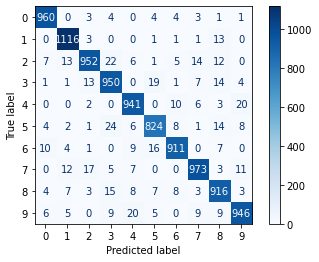

In [206]:
cm_digits = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_digits)

disp.plot(cmap=plt.cm.Blues)
plt.show()

Not bad:
- but in the context of many tasks this is not yet a viable system.
- e.g., reading checks, etc

- Next steps: increasing network complexity / train longer but not overfitting
- getting better fitting and test-set generalization

<center><b>Network Regularization</b></center>